In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
# Load the Dataset

In [2]:
#Loading data into dataframe
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
#Shape of dataframe
data.shape

(11054, 32)

# Summary of the dataset

In [4]:
# Get dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [5]:
# Check for missing values
print(data.isnull().sum())

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64


In [6]:
# Check the number of unique values per column
print(data.nunique())

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64


In [7]:
# No Missing Values → We don't need to handle NaNs
# All Columns are Integer Type (int64) → No need for encoding.
# Binary & Categorical Features
# Most features have only 2 or 3 unique values (likely categorical).
# The class column is the target variable (binary: 0 = phishing, 1 = legitimate).
# Index Column is Unique for Each Row → Can be dropped.

# ✅ Next Steps: Data Cleaning & Feature Selection

In [8]:
# 1. Drop Irrelevant Columns
# The Index column is just an identifier and does not contribute to predictions.
# Drop the 'Index' column
data = data.drop(columns=['Index'], errors='ignore')

In [9]:
#Listing the features of the dataset
data.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

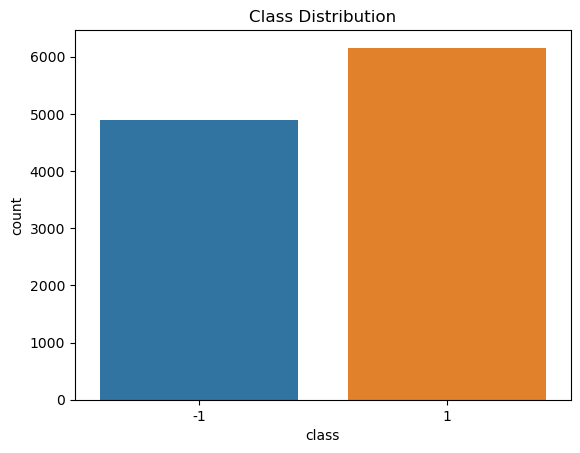

In [10]:
# 2.Check Class Distribution
# To see if the dataset is balanced (equal phishing vs. legitimate URLs):
# import seaborn as sns
# import matplotlib.pyplot as plt
sns.countplot(x=data['class'])
plt.title("Class Distribution")
plt.show()

In [11]:
# The class distribution looks fairly balanced, with slightly more legitimate websites (class = 1) 
# than phishing websites (class = -1). 
# Since the dataset is not heavily imbalanced, 
# we can proceed without oversampling or undersampling.

In [12]:
# The function data.describe().T provides a statistical summary of all numerical columns in the dataset.
# .T transposes the output (rows become columns and vice versa) for better readability.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


In [13]:
# Count → Number of non-null values.
# Mean → Average value of the column.
# Std (Standard Deviation) → Spread of values.
# Min & Max → Minimum & Maximum values.
# 25%, 50% (Median), 75% → Percentiles (helpful for detecting skewness).

# Data Splitting

In [14]:
# Splitting the dataset into dependant and independant fetature
y = data['class']
X = data.drop('class',axis=1)
X.shape, y.shape

((11054, 30), (11054,))

In [15]:
# y stores the dependent feature (target variable), which we want to predict.
# X contains independent features (all columns except 'class').
# These features (e.g., UsingIP, LongURL, HTTPS, etc.) are the inputs for the machine learning model.

In [16]:
# Splitting data into testing,training and validation
from sklearn.model_selection import train_test_split

# First, split into training (70%) and temp (30%) (which will be further split into validation & test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Now, split the temp set into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Checking the shapes
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7737, 30), (1658, 30), (1659, 30), (7737,), (1658,), (1659,))

In [17]:
# Creating holders to store the model performance results
ML_Model = []    # Stores model names
accuracy = []    # Stores accuracy scores
f1_score = []    # Stores F1 scores
recall = []      # Stores recall scores
precision = []   # Stores precision scores
def storeResults(model, a, b, c, d):
    ML_Model.append(model)       # Add model name
    accuracy.append(round(a, 3)) # Store accuracy (rounded to 3 decimal places)
    f1_score.append(round(b, 3)) # Store F1 score
    recall.append(round(c, 3))   # Store recall score
    precision.append(round(d, 3))# Store precision score

In [18]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
forest = RandomForestClassifier(n_estimators=10)
# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [19]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [20]:
#computing the accuracy, f1_score, Recall, precision of the model performance
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.973

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.976

Random Forest : Recall on training Data: 0.994
Random Forest : Recall on test Data: 0.986

Random Forest : precision on training Data: 0.988
Random Forest : precision on test Data: 0.966


In [21]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       735
           1       0.97      0.99      0.98       924

    accuracy                           0.97      1659
   macro avg       0.97      0.97      0.97      1659
weighted avg       0.97      0.97      0.97      1659



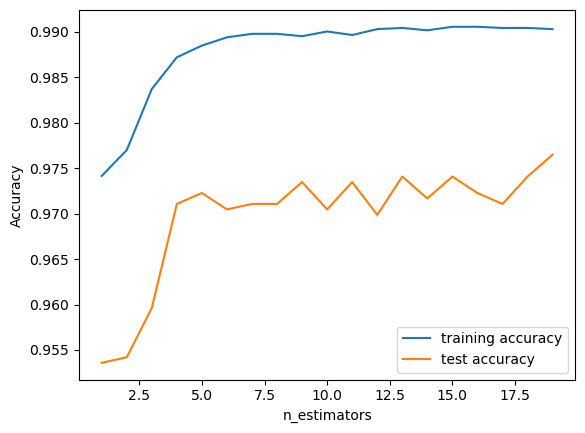

In [22]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [23]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

XGBoost Classifier: Accuracy on training Data: 0.986
XGBoost Classifier: Accuracy on test Data: 0.966

XGBoost Classifier: F1 Score on training Data: 0.985
XGBoost Classifier: F1 Score on test Data: 0.966

XGBoost Classifier: Recall on training Data: 0.985
XGBoost Classifier: Recall on test Data: 0.965

XGBoost Classifier: Precision on training Data: 0.986
XGBoost Classifier: Precision on test Data: 0.966

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       735
           1       0.97      0.97      0.97       924

    accuracy                           0.97      1659
   macro avg       0.97      0.97      0.97      1659
weighted avg       0.97      0.97      0.97      1659



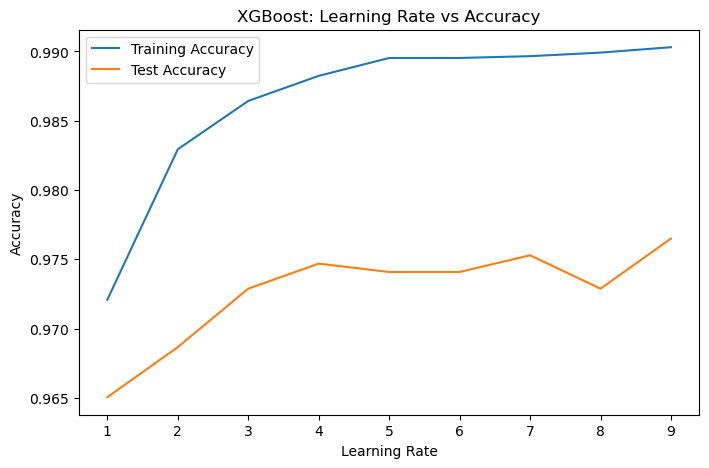

In [24]:
# Import necessary libraries
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

# Remap labels: Convert -1 → 0 (only for model training)
y_train_mapped = np.where(y_train == -1, 0, 1)
y_test_mapped = np.where(y_test == -1, 0, 1)

# Instantiate XGBoost Classifier
xgbc = XGBClassifier(max_depth=4, learning_rate=0.7, use_label_encoder=False, 
                     eval_metric='logloss', objective='binary:logistic')

# Fit the model using remapped labels
xgbc.fit(X_train, y_train_mapped)

# Predict target values (get 0 and 1 labels)
y_train_xgbc = xgbc.predict(X_train)
y_test_xgbc = xgbc.predict(X_test)

# Convert predictions back to original labels: 0 → -1
y_train_xgbc = np.where(y_train_xgbc == 0, -1, 1)
y_test_xgbc = np.where(y_test_xgbc == 0, -1, 1)

# Compute accuracy, f1-score, recall, precision
acc_train_xgbc = metrics.accuracy_score(y_train, y_train_xgbc)
acc_test_xgbc = metrics.accuracy_score(y_test, y_test_xgbc)
print("XGBoost Classifier: Accuracy on training Data: {:.3f}".format(acc_train_xgbc))
print("XGBoost Classifier: Accuracy on test Data: {:.3f}".format(acc_test_xgbc))
print()

f1_score_train_xgbc = metrics.f1_score(y_train, y_train_xgbc, average='macro')
f1_score_test_xgbc = metrics.f1_score(y_test, y_test_xgbc, average='macro')
print("XGBoost Classifier: F1 Score on training Data: {:.3f}".format(f1_score_train_xgbc))
print("XGBoost Classifier: F1 Score on test Data: {:.3f}".format(f1_score_test_xgbc))
print()

recall_score_train_xgbc = metrics.recall_score(y_train, y_train_xgbc, average='macro')
recall_score_test_xgbc = metrics.recall_score(y_test, y_test_xgbc, average='macro')
print("XGBoost Classifier: Recall on training Data: {:.3f}".format(recall_score_train_xgbc))
print("XGBoost Classifier: Recall on test Data: {:.3f}".format(recall_score_test_xgbc))
print()

precision_score_train_xgbc = metrics.precision_score(y_train, y_train_xgbc, average='macro')
precision_score_test_xgbc = metrics.precision_score(y_test, y_test_xgbc, average='macro')
print("XGBoost Classifier: Precision on training Data: {:.3f}".format(precision_score_train_xgbc))
print("XGBoost Classifier: Precision on test Data: {:.3f}".format(precision_score_test_xgbc))
print()

# Compute classification report
print(metrics.classification_report(y_test, y_test_xgbc))

# Hyperparameter tuning: Varying Learning Rate
training_accuracy = []
test_accuracy = []
depth = range(1, 10)

for n in depth:
    xgb_test = XGBClassifier(learning_rate=n*0.1, use_label_encoder=False, 
                             eval_metric='logloss', objective='binary:logistic')
    
    # Train using remapped labels (-1 → 0)
    xgb_test.fit(X_train, y_train_mapped)
    
    # Predict and convert back to -1,1
    y_train_pred = np.where(xgb_test.predict(X_train) == 0, -1, 1)
    y_test_pred = np.where(xgb_test.predict(X_test) == 0, -1, 1)
    
    # Record accuracy
    training_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))

# Plot training & testing accuracy for learning_rate values
plt.figure(figsize=(8, 5))
plt.plot(depth, training_accuracy, label="Training Accuracy")
plt.plot(depth, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.legend()
plt.title("XGBoost: Learning Rate vs Accuracy")
plt.show()

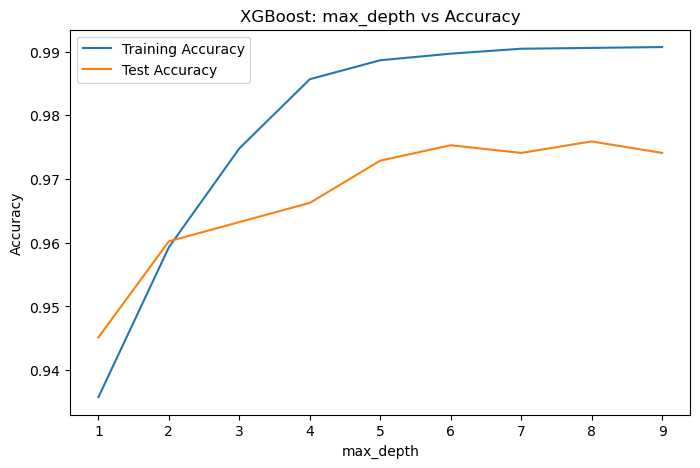

In [25]:
training_accuracy = []
test_accuracy = []

# Try different max_depth values from 1 to 10
depth_range = range(1, 10, 1)

for n in depth_range:
    xgb_test = XGBClassifier(max_depth=n, learning_rate=0.7, use_label_encoder=False, 
                             eval_metric='logloss', objective='binary:logistic')
    
    # Train using remapped labels (-1 → 0)
    xgb_test.fit(X_train, y_train_mapped)
    
    # Predict and convert back to -1,1
    y_train_pred = np.where(xgb_test.predict(X_train) == 0, -1, 1)
    y_test_pred = np.where(xgb_test.predict(X_test) == 0, -1, 1)
    
    # Record accuracy
    training_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))

# Plot training & testing accuracy for max_depth values
plt.figure(figsize=(8, 5))
plt.plot(depth_range, training_accuracy, label="Training Accuracy")
plt.plot(depth_range, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
plt.title("XGBoost: max_depth vs Accuracy")
plt.show()

In [26]:
# Storing the results. The order of parameters must match the function definition.
storeResults('XGBoost Classifier', acc_test_xgbc, f1_score_test_xgbc,
             recall_score_train_xgbc, precision_score_train_xgbc)

In [27]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [28]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [29]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc,average='macro')
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc,average='macro')
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc,average='macro')
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc,average='macro')
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.987
Gradient Boosting Classifier : Accuracy on test Data: 0.973

Gradient Boosting Classifier : f1_score on training Data: 0.987
Gradient Boosting Classifier : f1_score on test Data: 0.972

Gradient Boosting Classifier : Recall on training Data: 0.987
Gradient Boosting Classifier : Recall on test Data: 0.972

Gradient Boosting Classifier : precision on training Data: 0.988
Gradient Boosting Classifier : precision on test Data: 0.973


In [30]:
#computing the classification report of the model
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       735
           1       0.97      0.98      0.98       924

    accuracy                           0.97      1659
   macro avg       0.97      0.97      0.97      1659
weighted avg       0.97      0.97      0.97      1659



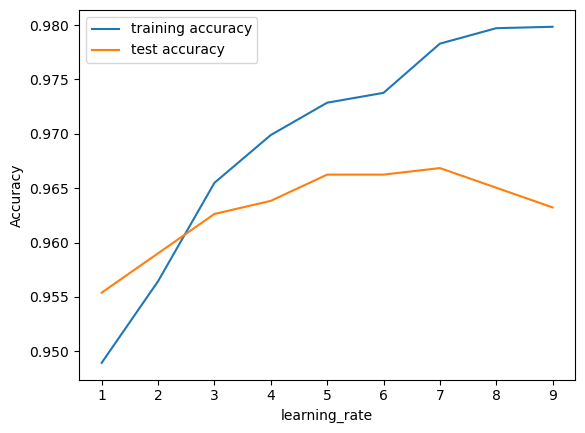

In [31]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

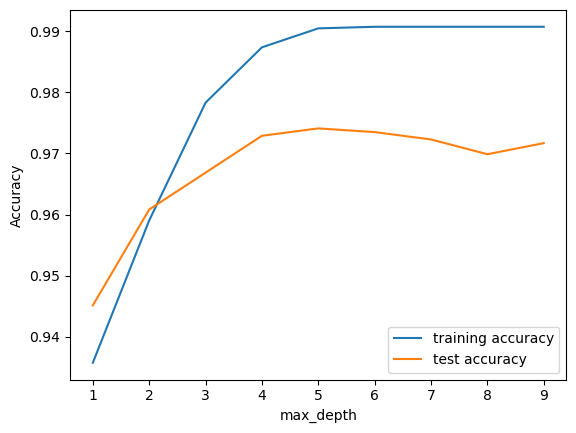

In [32]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [33]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train_scaled,y_train)

MLPClassifier()

In [36]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train_scaled)
y_test_mlp = mlp.predict(X_test_scaled)

In [37]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp,average='micro')
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp,average='micro')
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp,average='micro')
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp,average='micro')
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.988
Multi-layer Perceptron : Accuracy on test Data: 0.969

Multi-layer Perceptron : f1_score on training Data: 0.988
Multi-layer Perceptron : f1_score on test Data: 0.988

Multi-layer Perceptron : Recall on training Data: 0.988
Multi-layer Perceptron : Recall on test Data: 0.969

Multi-layer Perceptron : precision on training Data: 0.988
Multi-layer Perceptron : precision on test Data: 0.969


In [38]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [39]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [40]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.973,0.976,0.994,0.988
1,XGBoost Classifier,0.966,0.966,0.985,0.986
2,Gradient Boosting Classifier,0.973,0.972,0.987,0.988
3,Multi-layer Perceptron,0.969,0.969,0.988,0.988


In [41]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [42]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.973,0.976,0.994,0.988
1,Gradient Boosting Classifier,0.973,0.972,0.987,0.988
2,Multi-layer Perceptron,0.969,0.969,0.988,0.988
3,XGBoost Classifier,0.966,0.966,0.985,0.986


Text(0.5, 427.9555555555555, 'Predicted')

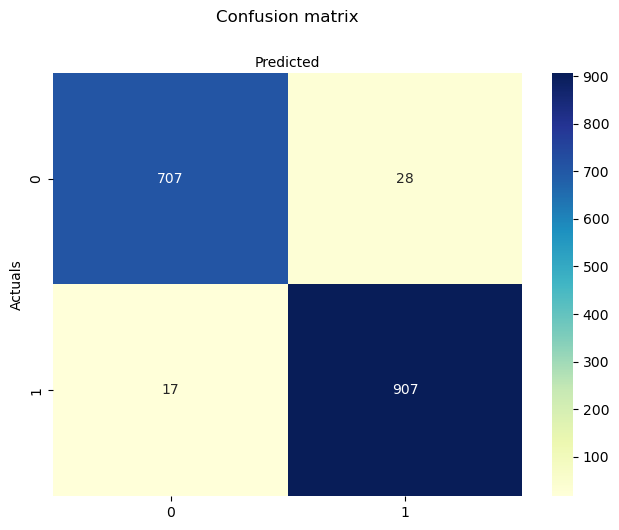

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test,y_test_gbc)
confusion_matrix
class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

In [44]:
import pickle
# dump information to that file
pickle.dump(gbc, open('url_detection.pkl', 'wb'))

In [45]:
gbc = pickle.load(open("url_detection.pkl","rb"))

In [46]:
from feature_extraction import FeatureExtraction
url="http://www.onlinesbi.digital"
#can provide any URL. this URL was taken from PhishTank
obj = FeatureExtraction(url)
x = np.array(obj.getFeaturesList()).reshape(1,30)
print("Feature Array: ",x)
y_pro_phishing = gbc.predict_proba(x)[0,0]
y_pro_non_phishing = gbc.predict_proba(x)[0,1]
print(y_pro_phishing, y_pro_non_phishing,"\n")
y_pred =gbc.predict(x)[0]
print("Prediction = ",y_pred)
if y_pred==1:
    print("It is a safe website")
else:
    print("Caution! Suspicious website detected")

Feature Array:  [[ 1  1  1  1  1  1  0 -1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1
   1 -1 -1  1  0  1]]
0.9999803219449143 1.9678055085714724e-05 

Prediction =  -1
Caution! Suspicious website detected
